In [1]:
# https://towardsdatascience.com/a-beginners-tutorial-on-building-an-ai-image-classifier-using-pytorch-6f85cb69cba7
"""
# Import Libraries
import torch
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import torchvision.models as models
import torch.nn as nn
import torch.optim as optim
import numpy as np
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
"""

'\n# Import Libraries\nimport torch\nimport torchvision.transforms as transforms\nimport torchvision.datasets as datasets\nimport torchvision.models as models\nimport torch.nn as nn\nimport torch.optim as optim\nimport numpy as np\nfrom PIL import Image\nimport numpy as np\nimport matplotlib.pyplot as plt\n'

In [2]:
# https://towardsdatascience.com/a-beginners-tutorial-on-building-an-ai-image-classifier-using-pytorch-6f85cb69cba7
import torch
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import torchvision.models as models
import torch.nn as nn
import torch.optim as optim
import numpy as np
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# 意味が分かりたければ、元サイトに分かりやすく書かれているので見てみる

In [4]:
"""
# Specify transforms using torchvision.transforms as transforms
# library
transformations = transforms.Compose([
    transforms.Resize(255),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])
"""

'\n# Specify transforms using torchvision.transforms as transforms\n# library\ntransformations = transforms.Compose([\n    transforms.Resize(255),\n    transforms.CenterCrop(224),\n    transforms.ToTensor(),\n    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])\n])\n'

In [5]:
# Step 2: Define transforms  (画像をコンピューターが分かりやすいように変更するための設定をする)
transformations = transforms.Compose([
    transforms.Resize(255),      #255×255の解像度に変更
    transforms.CenterCrop(224),    #224×224の中心部分をくりぬいて表示
    transforms.ToTensor(),        #tensor形に変更(数字にする)
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])   #各値(GRB)から平均を差し引き、次に標準偏差で除算します(標準化):(ほかの記事でもこれら値を用いていたので、これが標準と考えるべし)
])

In [6]:
"""
# Load in each dataset and apply transformations using
# the torchvision.datasets as datasets library
train_set = datasets.ImageFolder("root/label/train", transform = transformations)
val_set = datasets.ImageFolder("root/label/valid", transform = transformations)
"""

'\n# Load in each dataset and apply transformations using\n# the torchvision.datasets as datasets library\ntrain_set = datasets.ImageFolder("root/label/train", transform = transformations)\nval_set = datasets.ImageFolder("root/label/valid", transform = transformations)\n'

In [7]:
# (元データ)https://www.kaggle.com/kmader/food41
data = datasets.ImageFolder("C:\\Users\\shota\\Documents\\Data\\Kaggle\\lesson_image_data\\Food_Images_(Food-101)\\images\\", transform = transformations)
# Folderでラベルごとに分けられていることも自動的に考慮に入れて行っている
# PILやnumpyでは画像は(height x width x channel)の順番ですが、Pytorchでは(channel x height x width)

In [8]:
data

Dataset ImageFolder
    Number of datapoints: 101000
    Root location: C:\Users\shota\Documents\Data\Kaggle\lesson_image_data\Food_Images_(Food-101)\images\
    StandardTransform
Transform: Compose(
               Resize(size=255, interpolation=bilinear)
               CenterCrop(size=(224, 224))
               ToTensor()
               Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
           )

In [9]:
train_ratio = 0.8

train_size = int(len(data) * train_ratio)
val_size = len(data) - train_size
data_size = {'train':train_size, 'val':val_size}

train_set, val_set = torch.utils.data.random_split(data, [train_size, val_size])   #torch.utils.data.random_split:ランダムに、被りなく、分けてくれます

In [10]:
# Step 3: Import our data and put it into a DataLoader
"""
train_set = datasets.ImageFolder("root/label/train", transform = transformations)
val_set = datasets.ImageFolder("root/label/valid", transform = transformations)
"""
# 代わりに上の行のように分割して代用した  (参照元:https://qiita.com/ryryry/items/b1da4855504dcd3f9d98)

'\ntrain_set = datasets.ImageFolder("root/label/train", transform = transformations)\nval_set = datasets.ImageFolder("root/label/valid", transform = transformations)\n'

In [11]:
"""
# Put into a Dataloader using torch library
train_loader = torch.utils.data.DataLoader(train_set, batch_size=32, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_set, batch_size =32, shuffle=True)
"""

'\n# Put into a Dataloader using torch library\ntrain_loader = torch.utils.data.DataLoader(train_set, batch_size=32, shuffle=True)\nval_loader = torch.utils.data.DataLoader(val_set, batch_size =32, shuffle=True)\n'

In [12]:
train_loader = torch.utils.data.DataLoader(train_set, batch_size=32, shuffle=True)  #Dataloaderはそのdatasetsの中身をミニバッチごとに固めた集合のような感じ
val_loader = torch.utils.data.DataLoader(val_set, batch_size=32, shuffle=True)

In [13]:
# Step 4: Creating our model

In [14]:
"""
# Get pretrained model using torchvision.models as models library
model = models.densenet161(pretrained=True)
# Turn off training for their parameters
for param in model.parameters():
    param.requires_grad = False
"""

'\n# Get pretrained model using torchvision.models as models library\nmodel = models.densenet161(pretrained=True)\n# Turn off training for their parameters\nfor param in model.parameters():\n    param.requires_grad = False\n'

In [15]:
# 転移学習（Transfer Learning)
model = models.densenet161(pretrained=True)    #pretrained = Trueを設定して、事前トレーニングを行うように指定しました

for param in model.parameters():
    param.requires_grad = False

In [17]:
"""
import os
DATA_PATH = 'C:\\Users\\shota\\Documents\\Data\\Kaggle\\lesson_image_data\\Food_Images_(Food-101)\\'
for dirname, _, filenames in os.walk('C:\\Users\\shota\\Documents\\Data\\Kaggle\\lesson_image_data\\Food_Images_(Food-101)\\images\\'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
"""

"\nimport os\nDATA_PATH = 'C:\\Users\\shota\\Documents\\Data\\Kaggle\\lesson_image_data\\Food_Images_(Food-101)\\'\nfor dirname, _, filenames in os.walk('C:\\Users\\shota\\Documents\\Data\\Kaggle\\lesson_image_data\\Food_Images_(Food-101)\\images\\'):\n    for filename in filenames:\n        print(os.path.join(dirname, filename))\n"

In [28]:
# 機械学習で判定するラベルの数を確かめるために、ファイルではなくディレクトリのみを抽出して数を出した
import os, os.path
DATA_PATH = 'C:\\Users\\shota\\Documents\\Data\\Kaggle\\lesson_image_data\\Food_Images_(Food-101)\\images'
len([name for name in os.listdir(DATA_PATH) if os.path.isdir(os.path.join(DATA_PATH, name))])

101

In [29]:
os.listdir(DATA_PATH)

['apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito',
 'bruschetta',
 'caesar_salad',
 'cannoli',
 'caprese_salad',
 'carrot_cake',
 'ceviche',
 'cheesecake',
 'cheese_plate',
 'chicken_curry',
 'chicken_quesadilla',
 'chicken_wings',
 'chocolate_cake',
 'chocolate_mousse',
 'churros',
 'clam_chowder',
 'club_sandwich',
 'crab_cakes',
 'creme_brulee',
 'croque_madame',
 'cup_cakes',
 'deviled_eggs',
 'donuts',
 'dumplings',
 'edamame',
 'eggs_benedict',
 'escargots',
 'falafel',
 'filet_mignon',
 'fish_and_chips',
 'foie_gras',
 'french_fries',
 'french_onion_soup',
 'french_toast',
 'fried_calamari',
 'fried_rice',
 'frozen_yogurt',
 'garlic_bread',
 'gnocchi',
 'greek_salad',
 'grilled_cheese_sandwich',
 'grilled_salmon',
 'guacamole',
 'gyoza',
 'hamburger',
 'hot_and_sour_soup',
 'hot_dog',
 'huevos_rancheros',
 'hummus',
 'ice_cream',
 'lasagna',
 'lobster_bisque',
 'lobster

In [16]:
"""
# Create new classifier for model using torch.nn as nn library
classifier_input = model.classifier.in_features
num_labels = #PUT IN THE NUMBER OF LABELS IN YOUR DATA
classifier = nn.Sequential(nn.Linear(classifier_input, 1024),
                           nn.ReLU(),
                           nn.Linear(1024, 512),
                           nn.ReLU(),
                           nn.Linear(512, num_labels),
                           nn.LogSoftmax(dim=1))
# Replace default classifier with new classifier
model.classifier = classifier
"""

'\n# Create new classifier for model using torch.nn as nn library\nclassifier_input = model.classifier.in_features\nnum_labels = #PUT IN THE NUMBER OF LABELS IN YOUR DATA\nclassifier = nn.Sequential(nn.Linear(classifier_input, 1024),\n                           nn.ReLU(),\n                           nn.Linear(1024, 512),\n                           nn.ReLU(),\n                           nn.Linear(512, num_labels),\n                           nn.LogSoftmax(dim=1))\n# Replace default classifier with new classifier\nmodel.classifier = classifier\n'

In [32]:
classifier_input = model.classifier.in_features
num_labels = 101
classifier = nn.Sequential(nn.Linear(classifier_input, 1024),    #how many numbers we want in the second layer(thistime:1024)  (2208→1024)
                           nn.ReLU(),
                           nn.Linear(1024, 512),    #1024→512
                           nn.ReLU(),
                           nn.Linear(512, num_labels),    #512→101
                           nn.LogSoftmax(dim=1))      # The softmax function turns the outputted numbers into percentages for each label, and the log function is applied to make it computationally faster
model.classifier = classifier

In [33]:
classifier_input

2208

In [ ]:
# Step 5: Training and Evaluating our model

In [ ]:
"""
# Find the device available to use using torch library
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# Move model to the device specified above
model.to(device)
"""

In [34]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 96, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace=True)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace=True)
        (conv1): Conv2d(96, 192, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(192, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace=True)
        (conv2): Conv2d(192, 48, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(144, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (rel

In [ ]:
"""
# Set the error function using torch.nn as nn library
criterion = nn.NLLLoss()
# Set the optimizer function using torch.optim as optim library
optimizer = optim.Adam(model.classifier.parameters())
"""

In [35]:
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.classifier.parameters())

In [ ]:
"""
epochs = 10
for epoch in range(epochs):
    train_loss = 0
    val_loss = 0
    accuracy = 0
    
    # Training the model
    model.train()
    counter = 0
    for inputs, labels in train_loader:
        # Move to device
        inputs, labels = inputs.to(device), labels.to(device)
        # Clear optimizers
        optimizer.zero_grad()
        # Forward pass
        output = model.forward(inputs)
        # Loss
        loss = criterion(output, labels)
        # Calculate gradients (backpropogation)
        loss.backward()
        # Adjust parameters based on gradients
        optimizer.step()
        # Add the loss to the training set's rnning loss
        train_loss += loss.item()*inputs.size(0)
        
        # Print the progress of our training
        counter += 1
        print(counter, "/", len(train_loader))
        
    # Evaluating the model
    model.eval()
    counter = 0
    # Tell torch not to calculate gradients
    with torch.no_grad():
        for inputs, labels in val_loader:
            # Move to device
            inputs, labels = inputs.to(device), labels.to(device)
            # Forward pass
            output = model.forward(inputs)
            # Calculate Loss
            valloss = criterion(output, labels)
            # Add loss to the validation set's running loss
            val_loss += valloss.item()*inputs.size(0)
            
            # Since our model outputs a LogSoftmax, find the real 
            # percentages by reversing the log function
            output = torch.exp(output)
            # Get the top class of the output
            top_p, top_class = output.topk(1, dim=1)
            # See how many of the classes were correct?
            equals = top_class == labels.view(*top_class.shape)
            # Calculate the mean (get the accuracy for this batch)
            # and add it to the running accuracy for this epoch
            accuracy += torch.mean(equals.type(torch.FloatTensor)).item()
            
            # Print the progress of our evaluation
            counter += 1
            print(counter, "/", len(val_loader))
    
    # Get the average loss for the entire epoch
    train_loss = train_loss/len(train_loader.dataset)
    valid_loss = val_loss/len(val_loader.dataset)
    # Print out the information
    print('Accuracy: ', accuracy/len(val_loader))
    print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(epoch, train_loss, valid_loss))
"""

In [40]:
epochs = 1
for epoch in range(epochs):
    train_loss = 0
    val_loss = 0
    accuracy = 0
    
    model.train()
    counter = 0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        output = model.forward(inputs)
        loss = criterion(output, labels)
        loss.backward()   # # Calculate gradients (backpropogation)
        optimizer.step()
        train_loss += loss.item()* inputs.size(0)
        counter += 1
        print(counter, "/", len(train_loader))
        
    model.eval()
    counter = 0
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            output = model.forward(inputs)
            valloss = criterion(output, labels)
            val_loss = valloss.item()*inputs.size(0)
            output = torch.exp(output)
            top_p, top_class = output.topk(1, dim=1)
            equals = top_class == labels.view(*top_class.shape)
            accuracy += torch.mean(equals.type(torch.FloatTensor)).item()
            counter += 1
            print(counter, '/', len(val_loader))
            
    train_loss = train_loss/len(train_loader.dataset)
    valid_loss = val_loss/len(val_loader.dataset)
    print('Accuracy: ', accuracy/len(val_loader))
    print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(epoch, train_loss, valid_loss))

1 / 2525
2 / 2525
3 / 2525
4 / 2525
5 / 2525
6 / 2525
7 / 2525
8 / 2525
9 / 2525
10 / 2525
11 / 2525
12 / 2525
13 / 2525
14 / 2525
15 / 2525
16 / 2525
17 / 2525
18 / 2525
19 / 2525
20 / 2525
21 / 2525
22 / 2525
23 / 2525
24 / 2525
25 / 2525
26 / 2525
27 / 2525
28 / 2525
29 / 2525
30 / 2525
31 / 2525
32 / 2525
33 / 2525
34 / 2525
35 / 2525
36 / 2525
37 / 2525
38 / 2525
39 / 2525
40 / 2525
41 / 2525
42 / 2525
43 / 2525
44 / 2525
45 / 2525
46 / 2525
47 / 2525
48 / 2525
49 / 2525
50 / 2525
51 / 2525
52 / 2525
53 / 2525
54 / 2525
55 / 2525
56 / 2525
57 / 2525
58 / 2525
59 / 2525
60 / 2525
61 / 2525
62 / 2525
63 / 2525
64 / 2525
65 / 2525
66 / 2525
67 / 2525
68 / 2525
69 / 2525
70 / 2525
71 / 2525
72 / 2525
73 / 2525
74 / 2525
75 / 2525
76 / 2525
77 / 2525
78 / 2525
79 / 2525
80 / 2525
81 / 2525
82 / 2525
83 / 2525
84 / 2525
85 / 2525
86 / 2525
87 / 2525
88 / 2525
89 / 2525
90 / 2525
91 / 2525
92 / 2525
93 / 2525
94 / 2525
95 / 2525
96 / 2525
97 / 2525
98 / 2525
99 / 2525
100 / 2525
101 / 25

In [ ]:
# Step 5: Actually Using our model

In [42]:
model.eval()

DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 96, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace=True)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace=True)
        (conv1): Conv2d(96, 192, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(192, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace=True)
        (conv2): Conv2d(192, 48, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(144, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (rel

In [ ]:
"""
# Process our image
def process_image(image_path):
    # Load Image
    img = Image.open(image_path)
    
    # Get the dimensions of the image
    width, height = img.size
    
    # Resize by keeping the aspect ratio, but changing the dimension
    # so the shortest size is 255px
    img = img.resize((255, int(255*(height/width))) if width < height else (int(255*(width/height)), 255))
    
    # Get the dimensions of the new image size
    width, height = img.size
    
    # Set the coordinates to do a center crop of 224 x 224
    left = (width - 224)/2
    top = (height - 224)/2
    right = (width + 224)/2
    bottom = (height + 224)/2
    img = img.crop((left, top, right, bottom))
    
    # Turn image into numpy array
    img = np.array(img)
    
    # Make the color channel dimension first instead of last
    img = img.transpose((2, 0, 1))
    
    # Make all values between 0 and 1
    img = img/255
    
    # Normalize based on the preset mean and standard deviation
    img[0] = (img[0] - 0.485)/0.229
    img[1] = (img[1] - 0.456)/0.224
    img[2] = (img[2] - 0.406)/0.225
    
    # Add a fourth dimension to the beginning to indicate batch size
    img = img[np.newaxis,:]
    
    # Turn into a torch tensor
    image = torch.from_numpy(img)
    image = image.float()
    return image
"""

In [41]:
def process_image(image_path):
    img = Image.open(image_path)
    width, height = img.size
    img = img.resize((255, int(255*height/width)) if width < height else (int(255*width/height), 255))
    width, height = img.size
    
    # 224×224部分をくりぬくため、設定する(画像の位置番号は左上が最初)
    left = (width - 224) / 2
    top = (height - 224) / 2
    right = (width + 224) / 2
    bottom = (height + 224) /2
    img = img.crop((left, top, right, bottom))   #実際に切り抜く(時計でいう9時から時計回りの順番)
    
    img = np.array(img)
    
    img = img.transpose((2, 0, 1))   # transposeの説明 : https://deepage.net/features/numpy-transpose.html
    img = img / 255
    
    # transposeでcolorのchannelを最初に持ってきたことによって、以下のように標準化することができる
    img[0] = (img[0] - 0.485) / 0.229
    img[1] = (img[1] - 0.456) / 0.224
    img[2] = (img[2] - 0.406) / 0.225
    
    # Add a fourth dimension to the beginning to indicate batch size
    img = img[np.newaxis,:]
    
    # array型からtorch形に変換
    image = torch.from_numpy(img)
    image = image.float()
    return image

In [ ]:
"""
# Using our model to predict the label
def predict(image, model):
    # Pass the image through our model
    output = model.forward(image)
    
    # Reverse the log function in our output
    output = torch.exp(output)
    
    # Get the top predicted class, and the output percentage for
    # that class
    probs, classes = output.topk(1, dim=1)
    return probs.item(), classes.item()
"""

In [43]:
def predict(image, model):
    output = model.forward(image)
    output = torch.exp(output)
    probs, classes = output.topk(1, dim=1)
    return probs.item(), classes.item()

In [ ]:
"""
# Show Image
def show_image(image):
    # Convert image to numpy
    image = image.numpy()
    
    # Un-normalize the image
    image[0] = image[0] * 0.226 + 0.445
    
    # Print the image
    fig = plt.figure(figsize=(25, 4))
    plt.imshow(np.transpose(image[0], (1, 2, 0)))
"""

In [44]:
def show_image(image):
    # Convert image to numpy
    image = image.numpy()
    
    # 標準化したもの元に戻す
    image[0] = image[0] * 0.226 + 0.445
    
    fig = plt.figure(figsize=(25, 4))
    plt.imshow(np.transpose(image[0], (1,2,0)))

In [45]:
"""
# Process Image
image = process_image("root/image1234.jpg")
# Give image to model to predict output
top_prob, top_class = predict(image, model)
# Show the image
show_image(image)
# Print the results
print("The model is ", top_prob*100, "% certain that the image has a predicted class of ", top_class  )
"""

'\n# Process Image\nimage = process_image("root/image1234.jpg")\n# Give image to model to predict output\ntop_prob, top_class = predict(image, model)\n# Show the image\nshow_image(image)\n# Print the results\nprint("The model is ", top_prob*100, "% certain that the image has a predicted class of ", top_class  )\n'

The model is  98.68631362915039 % certain that the image has a predicted class of  12


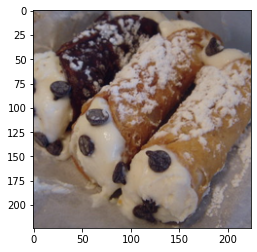

In [46]:
# Process Image
image = process_image("C:\\Users\\shota\\Documents\\Data\\Kaggle\\lesson_image_data\\Food_Images_(Food-101)\\images\\cannoli\\2586.jpg")
# Give image to model to predict output
top_prob, top_class = predict(image, model)
# Show the image
show_image(image)
# Print the results
print("The model is ", top_prob*100, "% certain that the image has a predicted class of ", top_class  )

# フォルダは0から数えて12番目にあるので、ダミーラベルはあっていることが分かる

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


The model is  93.9079761505127 % certain that the image has a predicted class of  12


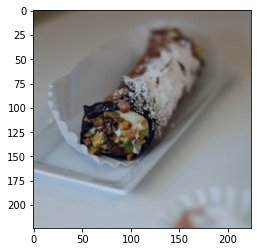

In [48]:
# Process Image
image = process_image("C:\\Users\\shota\\Documents\\Data\\Kaggle\\lesson_image_data\\Food_Images_(Food-101)\\images\\cannoli\\3621.jpg")
# Give image to model to predict output
top_prob, top_class = predict(image, model)
# Show the image
show_image(image)
# Print the results
print("The model is ", top_prob*100, "% certain that the image has a predicted class of ", top_class  )

In [ ]:
# 結果: ある程度成功していることが分かる